In [1]:
import pandas as pd
import plotnine as p9


In [2]:
df = pd.read_csv('../data/drug_consumption_clean.csv', sep = ',')

In [3]:
df.head(5)

,age,gender,education,country,n_score,e_score,o_score,a_score,c_score,impulsive,sensation_seeing,alcohol,caffeine,nicotine,recreational_drugs,stimulant_drugs,sedative_drugs,high_risk_drugs
0,35-44,Female,Estudios de FP,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,0,0,0,0
1,25-34,Male,Estudios superiores,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,1,1,0,0
2,35-44,Male,Estudios de FP,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,1,0,1,0,0,0
3,18-24,Female,Estudios superiores,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,0,0,0,1,0
4,35-44,Female,Estudios superiores,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,0,1,0,0,0


plotnine no tiene la libreria de geom_density_ridges, por lo que no se puede hacer el grafico de densidad.

Hago los graficos de personalidad con la biblioteca matplotlib y seaborn. 

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def personalidad_vs_drug_vs_usage(df, drug_number, personality_number):
    temp = df.columns
    drug = temp[drug_number]
    personality_col = temp[personality_number]
    
    personality = pd.concat([df[df[drug]==1][personality_col], df[df[drug]==0][personality_col]], axis=1)
    personality.columns = [f'{drug} User', 'Never Used']
    
    PersonPlot = plt.figure(figsize=(15, 6))
    sns.kdeplot(data=df, x=personality_col, hue=drug, fill=True, alpha=0.5, linewidth=1)

    plt.ylabel('Density')
    plt.xlabel(str(personality_col))
    plt.title(f'Distribution of {personality_col} by {drug} usage')
    plt.legend(title=f'Drug Usage: {drug}', labels=[f'{drug} User', 'Never Used'], facecolor='white')
    plt.show()

# Insights con gráficos

###  Modelo "NEO-PI-R

N_score: Este puntaje se refiere al neuroticismo, que está relacionado con la tendencia a experimentar emociones negativas como ansiedad, depresión e inestabilidad emocional.

E_score: Este puntaje corresponde a la extraversión, que indica la disposición a buscar estimulación en el entorno externo, la sociabilidad, la assertividad y la búsqueda de emociones.

O_score: Este puntaje representa la apertura a la experiencia, que se refiere a la disposición a ser abierto a nuevas ideas, tener una amplia gama de intereses, ser creativo y buscar experiencias nuevas.

A_score: Este puntaje se asocia con la amabilidad, que refleja la disposición a ser compasivo, cooperativo, confiado y solidario con los demás.

C_score: Por último, este puntaje corresponde a la responsabilidad, que se relaciona con la organización, la perseverancia, el control de los impulsos y la orientación a metas.

https://www.sapa-project.org/blogs/NEOmodel.html
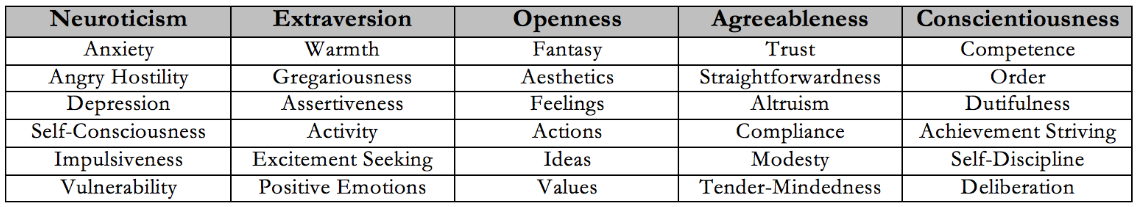

Tengo varios insights que iré escribiendo a lo largo de esta semana, ya que tengo que aportar bibliorafia y aparte sacar os graficos. Las ideas ya las tengo escritas y planteadas.

# Insights

### Openess

La dimensión "Openess" o "Openness to experience" como parte del Modelo de los Cinco Factores de la personalidad, incluye seis facetas: imaginación activa, sensibilidad estética, atención a los sentimientos internos, preferencia por la variedad, curiosidad intelectual y desafío a la autoridad. 

La apertura a la experiencia se distribuye normalmente, con algunas personas puntuando extremadamente alto o bajo. Aquellos con baja apertura son considerados cerrados a nuevas experiencias, prefieren rutinas familiares y tienen intereses más limitados.

La apertura se relaciona positivamente con la creatividad, inteligencia y conocimiento. También se asocia con la absorción y tiene relaciones más modestas con el bienestar subjetivo y las enfermedades mentales. Se mide comúnmente con medidas de autorreporte, y sus subcomponentes incluyen disposiciones intelectuales y aspectos experienciales.

En los siguientes grafícos se ha observado que "Openness to experience" está relacionada con el uso de drogas. 

In [21]:
df.columns

Index(['age', 'gender', 'education', 'country', 'n_score', 'e_score',
       'o_score', 'a_score', 'c_score', 'impulsive', 'sensation_seeing',
       'alcohol', 'caffeine', 'nicotine', 'recreational_drugs',
       'stimulant_drugs', 'sedative_drugs', 'high_risk_drugs'],
      dtype='object')

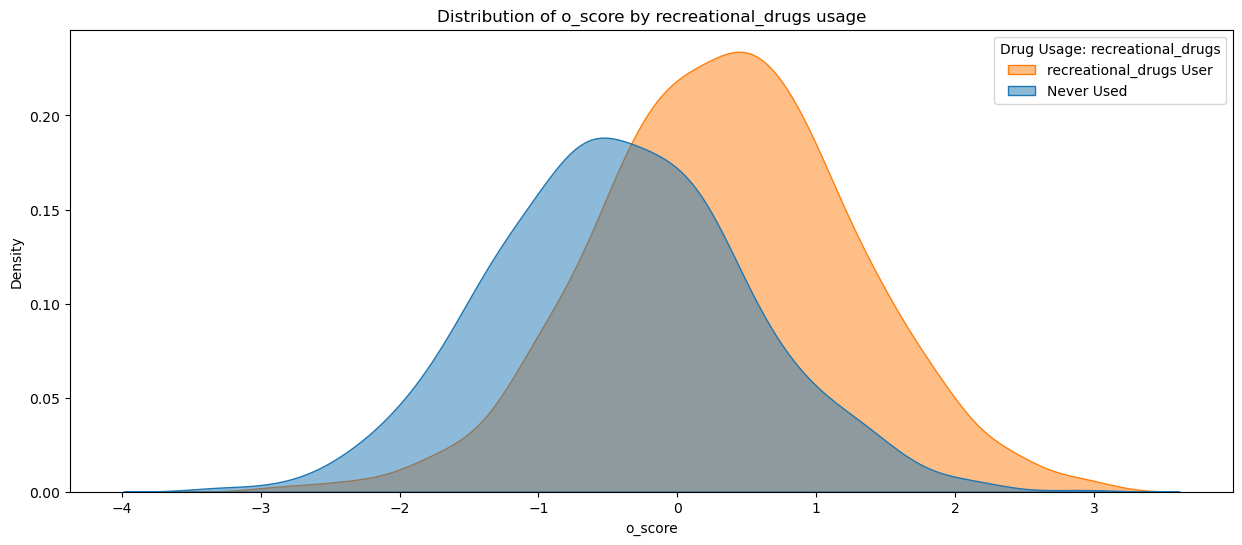

In [20]:
# Grafíco del consumo de drogas recreacionales.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("recreational_drugs"),
                     df.columns.get_loc("o_score"))

En este caso tenemos las drogas recreativas, entre las que se encuentra la marihuna. Según el siguiente articulo escrito en wikipedia (https://en.wikipedia.org/wiki/Openness_to_experience), hay una mención de la relación entre la apertura a la experiencia y el uso de drogas recreativas. En particular, se destaca que psicólogos en la década de 1960 usaron el concepto de "Openness to experience" para describir a personas más propensas a usar marihuana. En estos estudios, la apertura se definió con características como alta creatividad, disposición a la aventura, búsqueda interna de novedad y baja autoritarismo.

En este grupo tambien hemos agrupado hongos, y en este articulo tambien se detalla que en un estudio realizado en 2011 se encontró que el score en  "Openness to experience" aumentó después del uso de psilocibina (un compuesto psicoactivo presente en hongos alucinógenos), y que este aumento se mantuvo más de un año después de la experiencia. Los participantes que tuvieron una "complete mystical experience" durante el uso de psilocibina experimentaron un aumento significativo en este factor de la personalidad.
link(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2373294/)

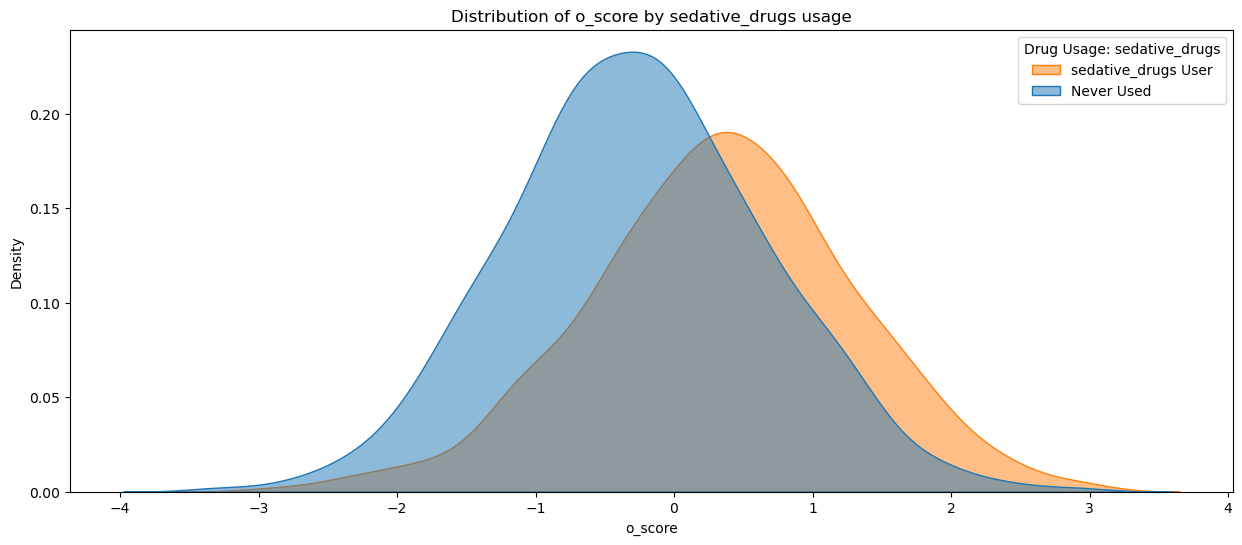

In [24]:
# Consumo de drogas estimulantes.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("stimulant_drugs"),
                     df.columns.get_loc("o_score"))

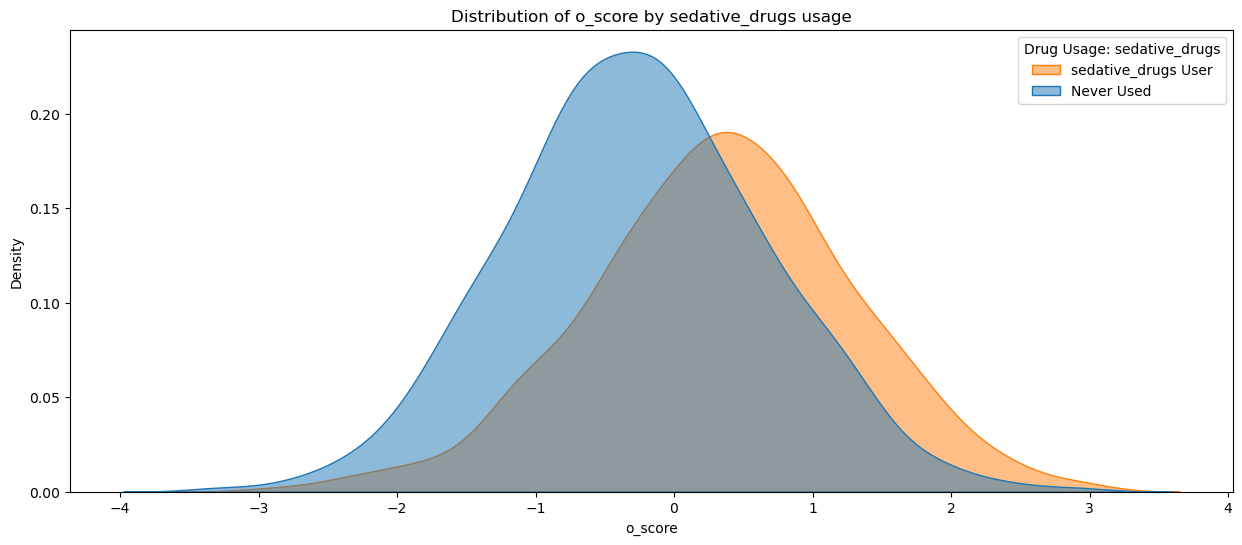

In [27]:
# Consumo de drogas sedativas.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("sedative_drugs"),
                     df.columns.get_loc("o_score"))

Basándonos en los datos, se puede concluir que existe una relación significativa entre la apertura a la experiencia y el consumo de drogas. Individuos con un nivel más alto de apertura, caracterizado por rasgos como una imaginación activa, sensibilidad estética, curiosidad intelectual y una preferencia por la variedad, son más propensos a participar en el consumo de drogas.

Es importante destacar que el o_score se distribuye de manera normal en la población, lo cual se ve representado por aquellas personas que no consumen. Aquellos con una mayor apertura tienden a ser más abiertos y mostrar mayor interes por tener nuevas experiencias.

En resumen, la conclusión extraída es que las personas con una disposición más abierta son más propensas a participar en el consumo de drogas, lo que sugiere una conexión entre los rasgos de personalidad y el comportamiento de consumo de sustancias.

#######################

### Neuroticism 

El neuroticismo es un rasgo fundamental de la personalidad en la psicología en la teoría de los Cinco Grandes. 
Según varios articulos, las personas con puntuaciones altas en neuroticismo tienden a ser más propensas a experimentar estados de ánimo negativos, como ansiedad, preocupación, miedo y enojo. Este rasgo se asocia con respuestas deficientes al estrés y la interpretación pesimista de situaciones ordinarias. 

Los individuos con niveles más altos de neuroticismo pueden recurrir a comportamientos riesgosos como una forma de regulación emocional, a pesar de las consecuencias a largo plazo.

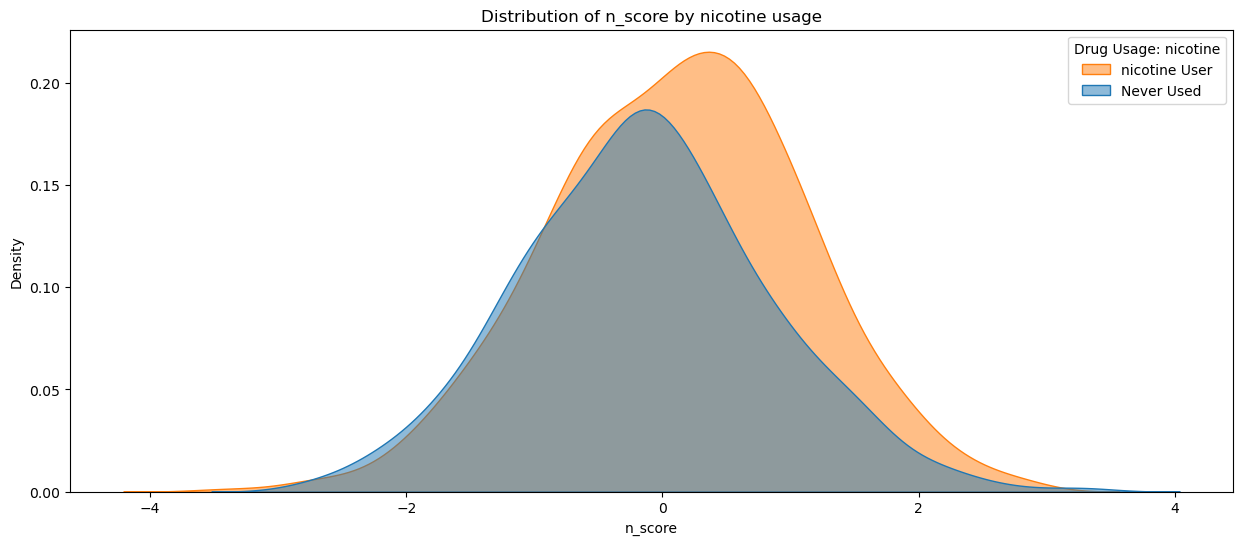

In [33]:
# Consumo de nicotina.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("nicotine"),
                     df.columns.get_loc("n_score"))

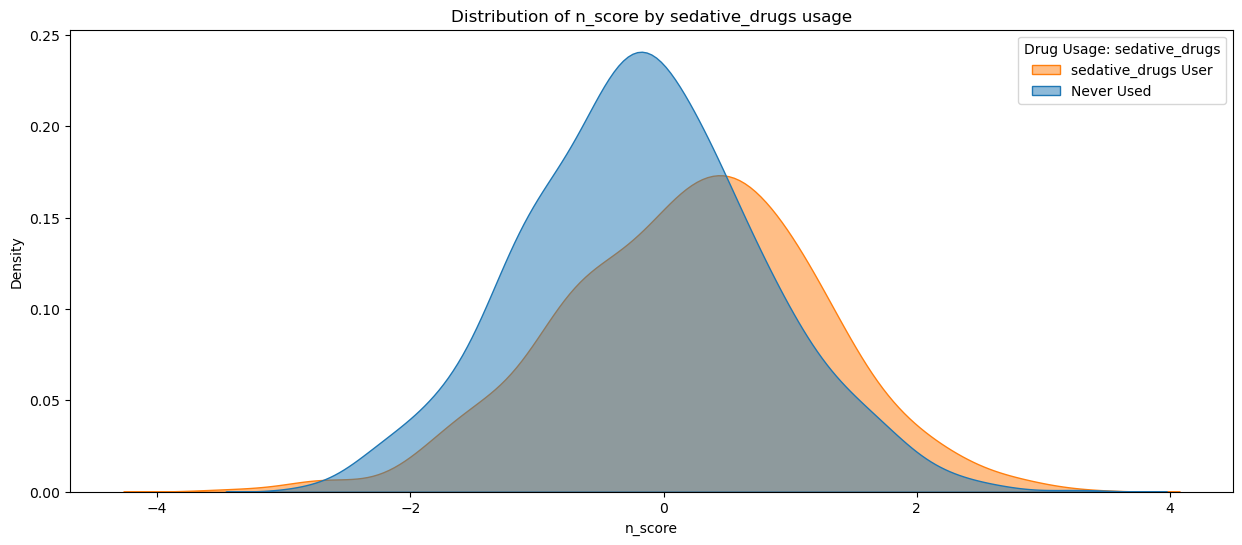

In [37]:
# Consumo de drogas sedativas.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("sedative_drugs"),
                     df.columns.get_loc("n_score"))

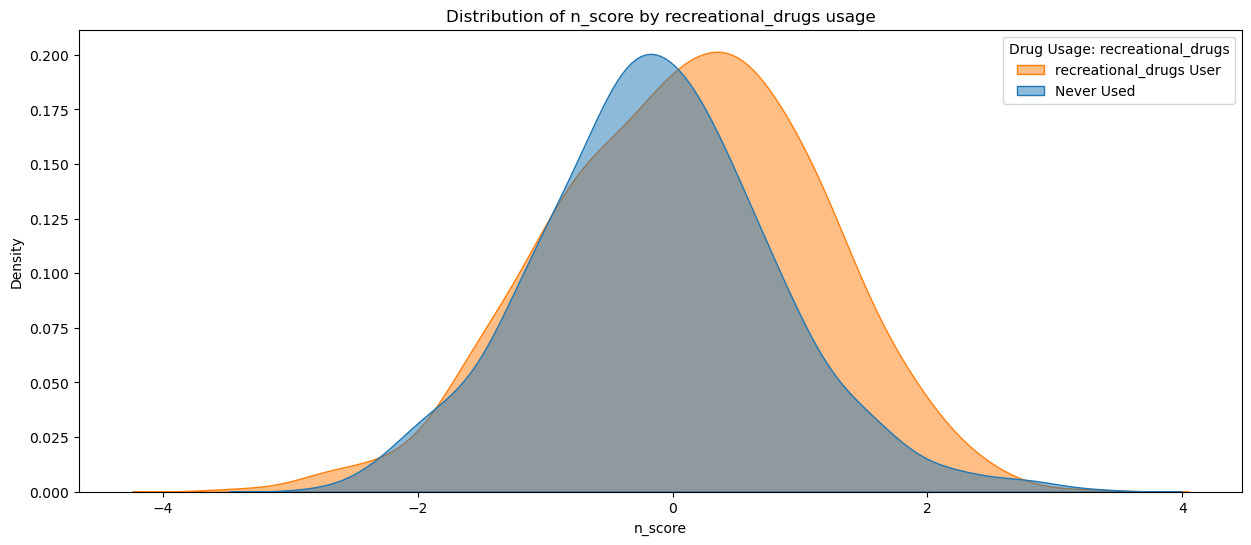

In [38]:
# Consumo de drogas recreacionales.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("recreational_drugs"),
                     df.columns.get_loc("n_score"))

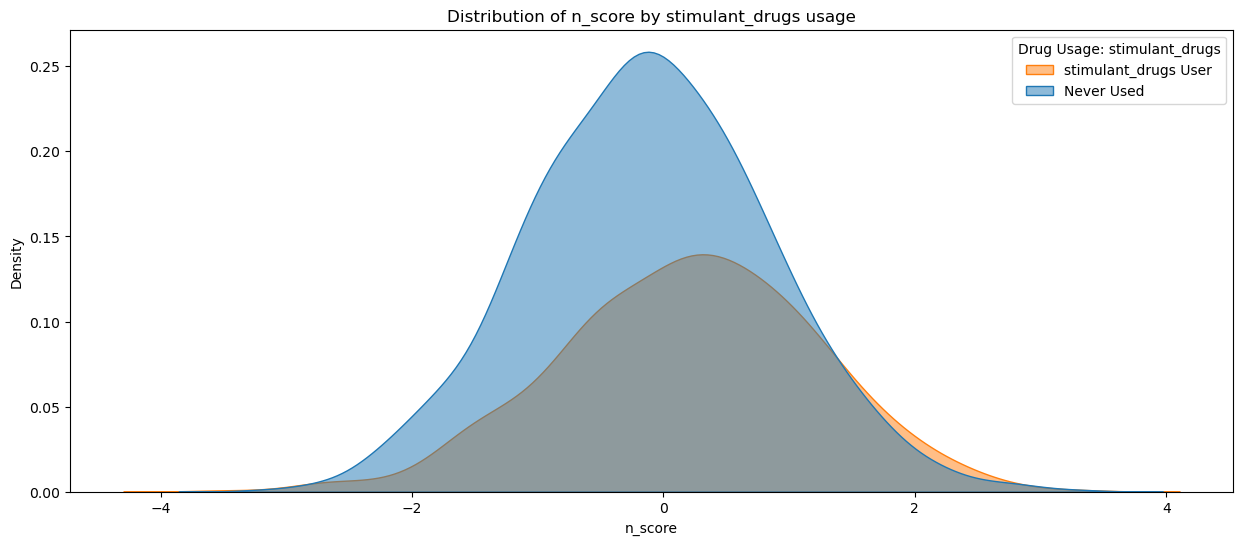

In [39]:
# Consumo de drogas estimulantes.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("stimulant_drugs"),
                     df.columns.get_loc("n_score"))

El neuroticismo, como rasgo de personalidad, ha demostrado tener una asociación significativa con el consumo de sustancias, como el tabaco y la nicotina, como una estrategia para hacer frente a las emociones negativas y el estrés. La búsqueda de alivio temporal y calma, especialmente entre aquellos con niveles más altos de neuroticismo, se manifiesta en la elección de métodos específicos de administración de nicotina, como fumar tabaco.

Además, la relación entre el neuroticismo y el riesgo de trastornos de ansiedad y depresión se ha confirmado en estudios, y algunos individuos recurren a drogas como anfetaminas, cocaína y metanfetaminas para automedicarse en respuesta a los síntomas de estos trastornos.

https://pubmed.ncbi.nlm.nih.gov/9489934/#:~:text=Neurotic%20subjects%20become%20more%20anxious,or%20even%20reversed%20with%20tablets.

### Conscientiousness

La "conscientiousness" o conciencia como un rasgo de personalidad que se refiere a ser cuidadoso, diligente y orientado a realizar tareas de manera eficiente y organizada. Las personas con altos niveles de conscientiousness tienden a ser trabajadoras y confiables, mientras que aquellos con bajos niveles pueden ser menos orientados a metas y más propensos a comportamientos antisociales.

En los siguientes gráficos se observa que las personas con un puntaje menor de conciencia son más propensas a consumir drogas.

https://en.wikipedia.org/wiki/Conscientiousness

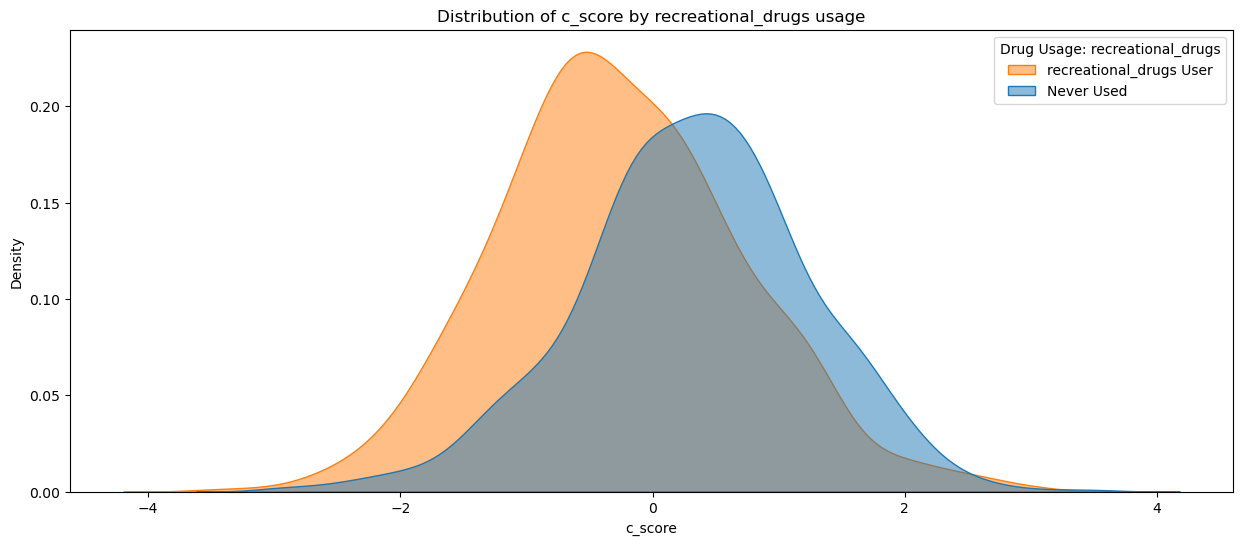

In [43]:
# Consumo de drogas recreacionales.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("recreational_drugs"),
                     df.columns.get_loc("c_score"))

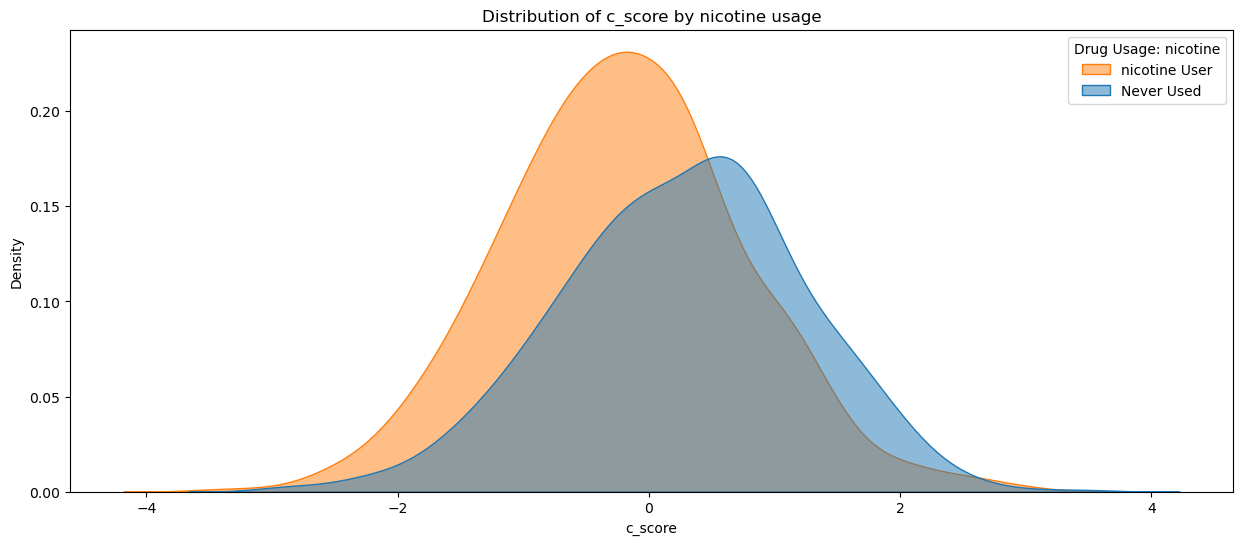

In [49]:
# Consumo de drogas recreacionales.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("nicotine"),
                     df.columns.get_loc("c_score"))

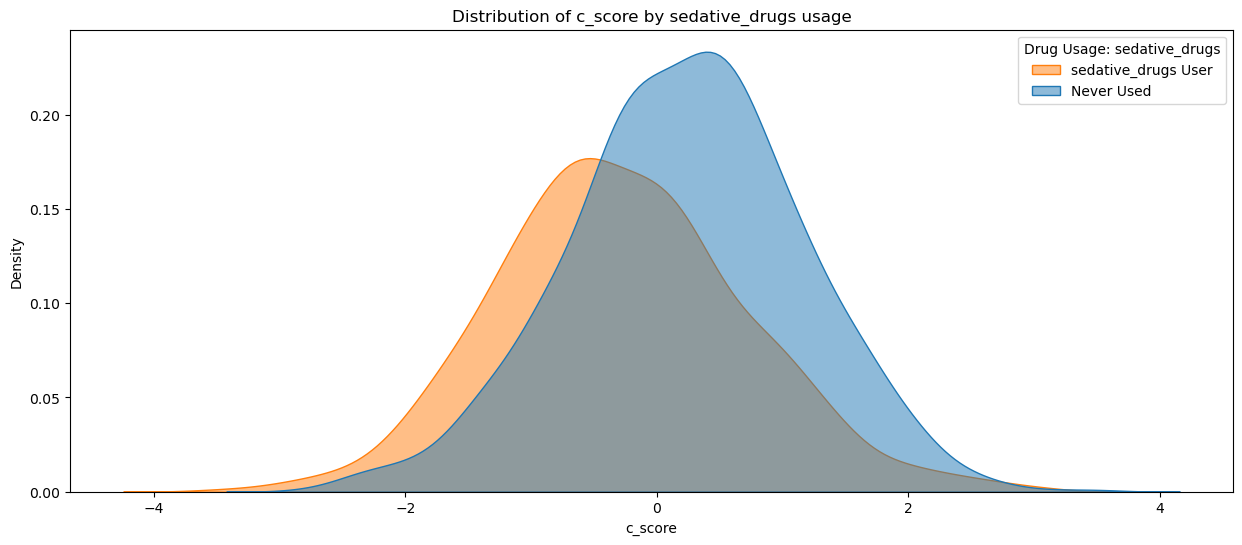

In [42]:
# Consumo de drogas sedativas.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("sedative_drugs"),
                     df.columns.get_loc("c_score"))

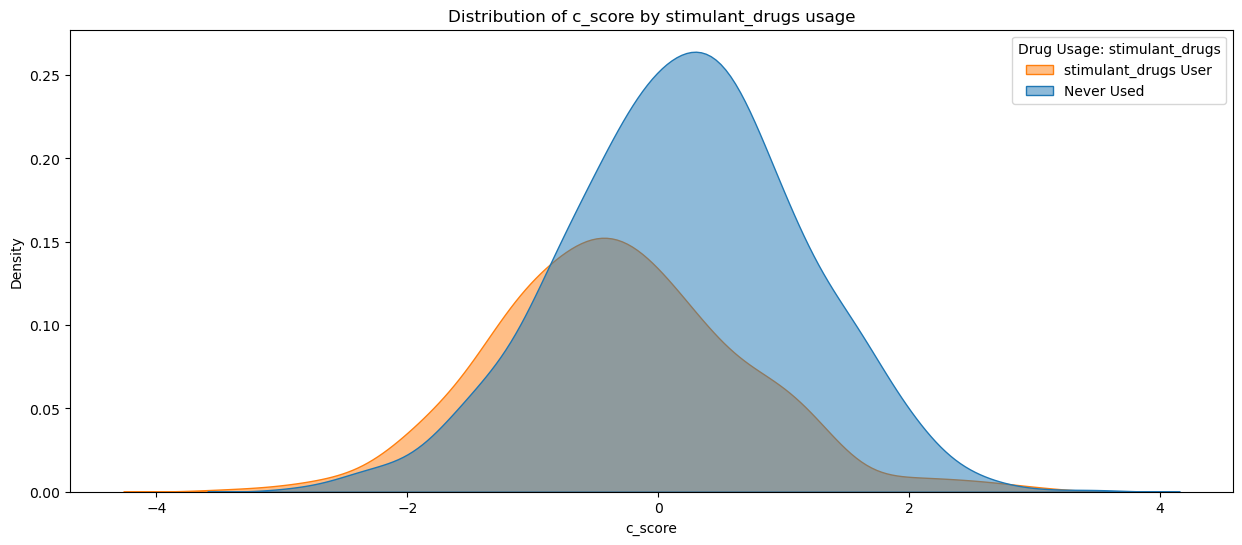

In [40]:
# Consumo de drogas estimulantes.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("stimulant_drugs"),
                     df.columns.get_loc("c_score"))

### Sensación de ser visto

Basándonos en los siguientes gráficos, se puede observar que hay una relación entre la sensación de ser visto y el consumo de drogas estimulantes, recreacionales y nicotina. 
Las personas que consumen este tipo de drogas experimentan una mayor sensación de ser observadas o vigiladas.

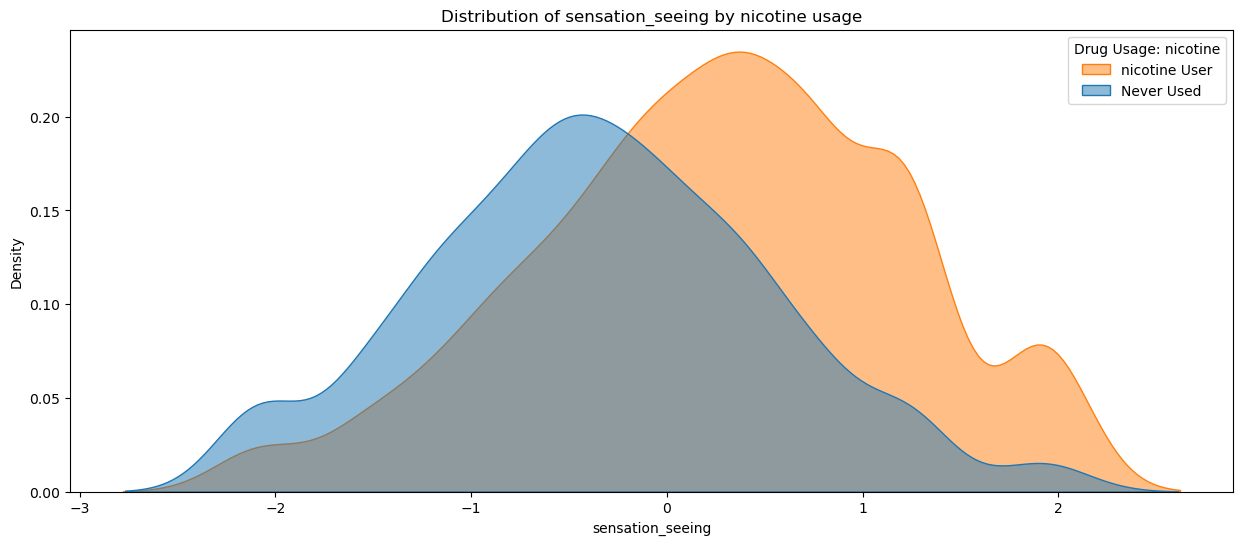

In [50]:
# Consumo de nicotina.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("nicotine"),
                     df.columns.get_loc("sensation_seeing"))

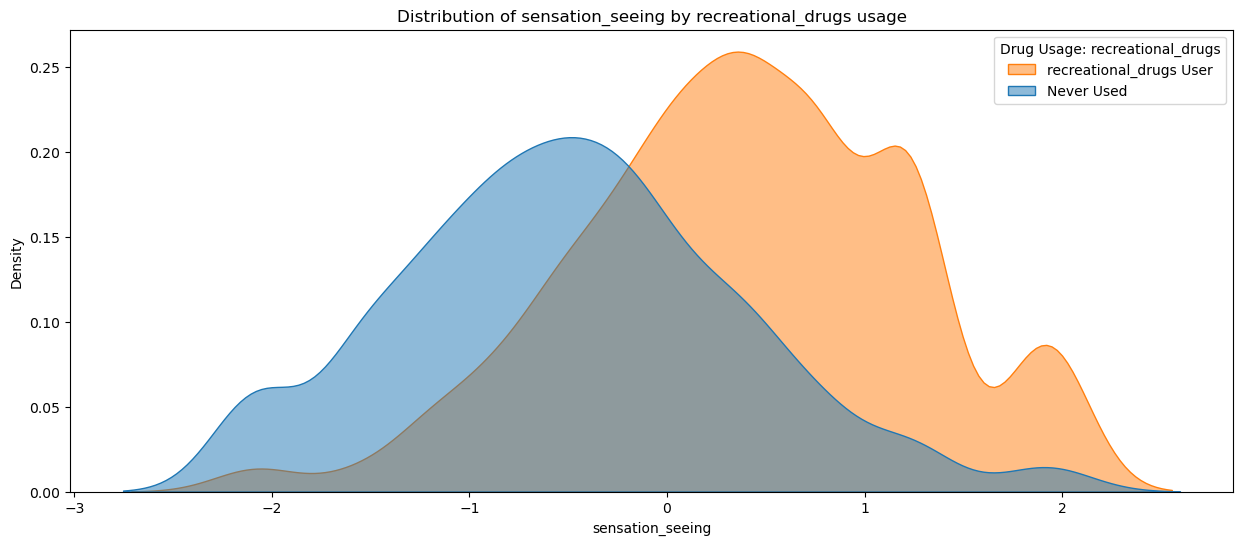

In [54]:
# Consumo de drogas recreacionales.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("recreational_drugs"),
                     df.columns.get_loc("sensation_seeing"))

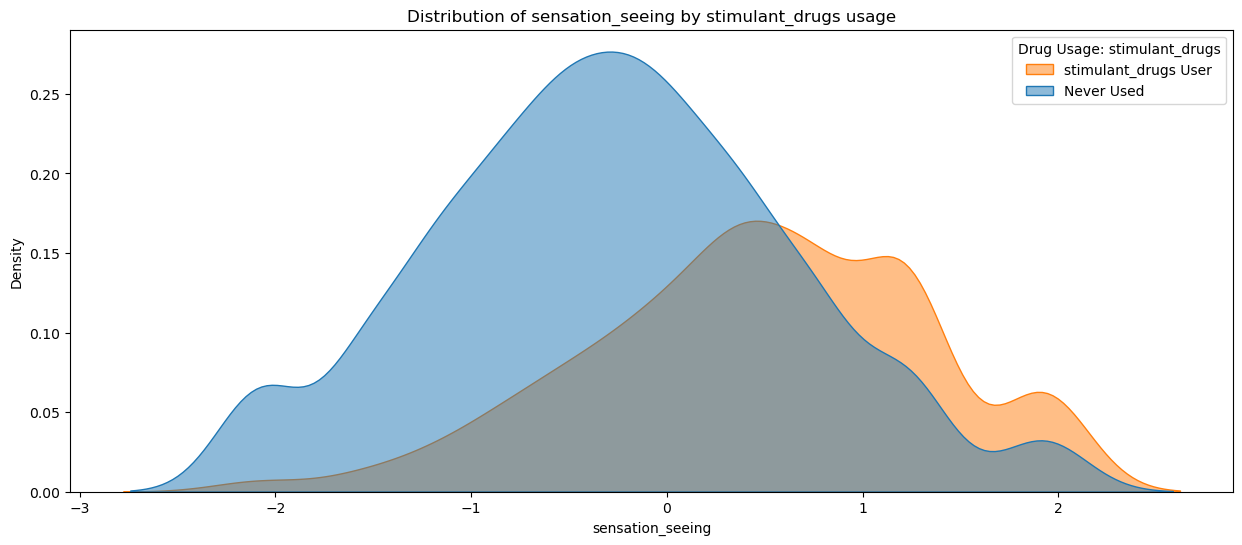

In [55]:
# Consumo de drogas estímulantes.
personalidad_vs_drug_vs_usage(df, 
                     df.columns.get_loc("stimulant_drugs"),
                     df.columns.get_loc("sensation_seeing"))